In [1]:
import numpy as np
import pandas as pd
import math   as m
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.metrics import mean_squared_error ,mean_absolute_error ,r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv(r"C:\Users\barho\Downloads\archive (22)\Advertising.csv")

In [3]:
df.head()
df.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
df.duplicated().sum()

0

In [6]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


<Axes: >

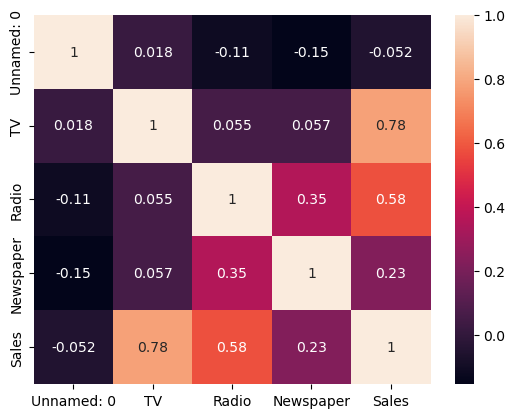

In [7]:
sns.heatmap(df.corr(),annot=True)

In [8]:
df.drop('Unnamed: 0',axis = 1,inplace = True)


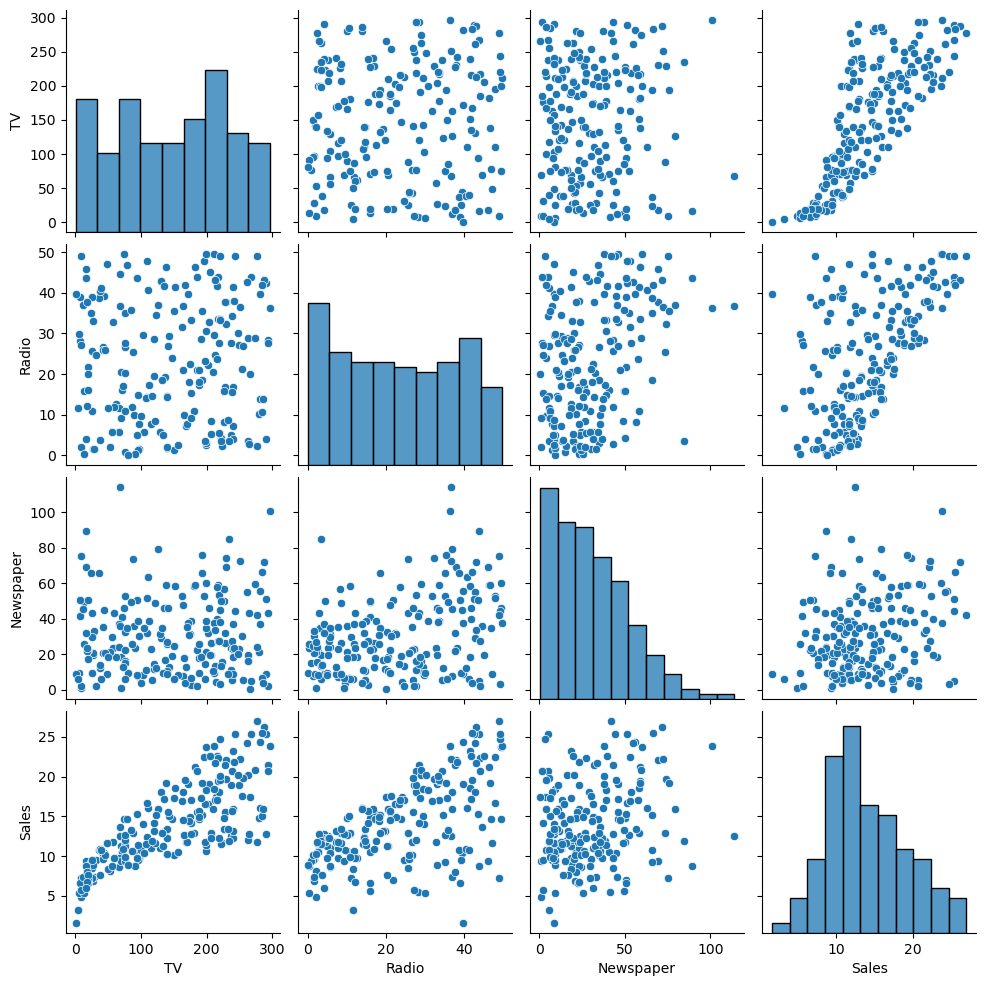

In [9]:
sns.pairplot(df)


In [10]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [11]:
x=df[['TV', 'Radio', 'Newspaper']]
y=df[['Sales']]

In [12]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)


In [13]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=45)

In [14]:
model1=LinearRegression()
model2=DecisionTreeRegressor()
model3=RandomForestRegressor()

In [15]:
def cal(model):
    model.fit(x_train,y_train)
    pre=model.predict(x_test)
    
    
    print(f"R2 Score =  {r2_score(y_test,pre) * 100:.2f}%")
    print('Mean Absolute Error = ',mean_absolute_error(y_test, pre))
    print('Mean Squared Error = ',mean_squared_error(y_test, pre))
    print('Root Mean Squared Error = ',m.sqrt(mean_squared_error(y_test, pre)))
    
    # Scatter plot for real and predict data
    plt.scatter(y_test,pre)
    return model
    

R2 Score =  89.56%
Mean Absolute Error =  1.0788802763848646
Mean Squared Error =  2.256494247280935
Root Mean Squared Error =  1.5021631892976657


LinearRegression()

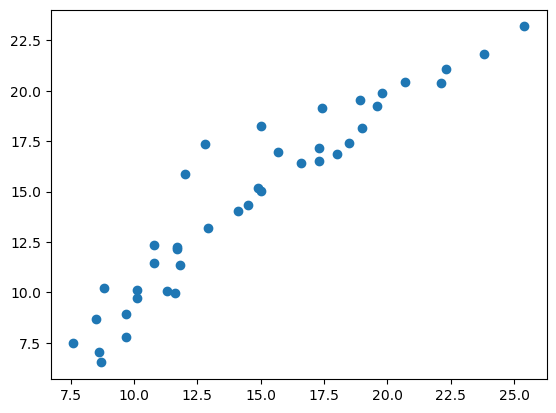

In [16]:
cal(model1)

R2 Score =  94.72%
Mean Absolute Error =  0.8150000000000002
Mean Squared Error =  1.1415000000000004
Root Mean Squared Error =  1.068410033648131


DecisionTreeRegressor()

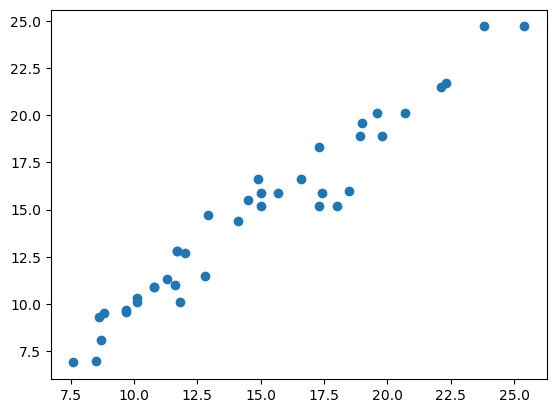

In [17]:
cal(model2)

R2 Score =  97.82%
Mean Absolute Error =  0.5317249999999966
Mean Squared Error =  0.47116182499999626
Root Mean Squared Error =  0.6864122850007831


RandomForestRegressor()

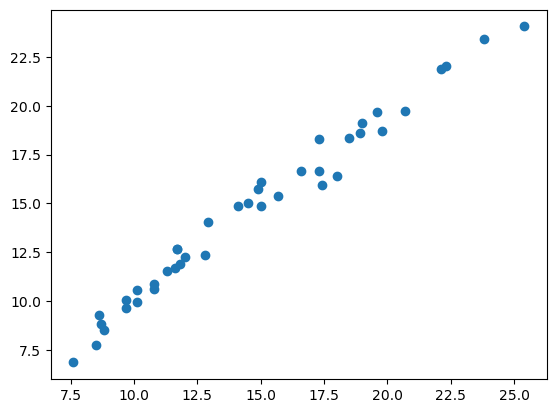

In [18]:
cal(model3)